## **Predicting Term Deposit**

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importing dataset
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#Reindexing the data
column = ['job','marital','education','default','housing','loan','contact','month','poutcome','age','balance','day','duration','campaign','pdays','previous','y']
df = df.reindex(columns=column)
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,58,2143,5,261,1,-1,0,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,44,29,5,151,1,-1,0,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,33,2,5,76,1,-1,0,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,47,1506,5,92,1,-1,0,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,33,1,5,198,1,-1,0,no


## Exploratory Data Analysis

In [0]:
df.shape

(45211, 17)

- > Total of 45211 observations

In [0]:
df.dtypes

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
age           int64
balance       int64
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

- >Data contains both numerical and catogorical variables

- >We should encode catogorical variables before feeding them to models

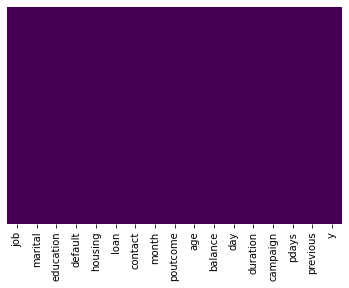

In [0]:
#Checking for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- >No missing data




In [0]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- > Age range: 18 to 95<br> Balance range:  -8019 to 102127

- >observing *mean values and max values*, there might be outliers in age, balance, duration, campaign, pdays, previous columns

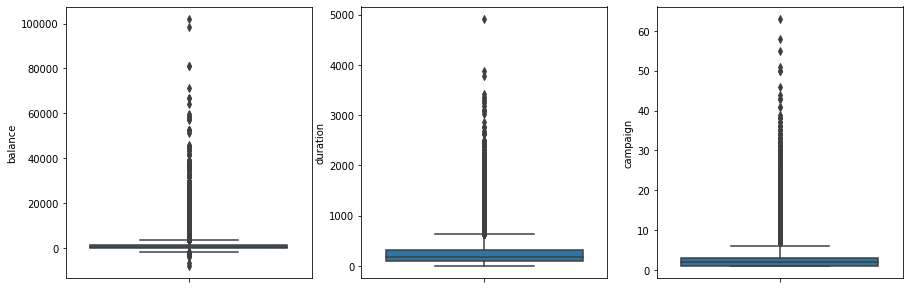

In [0]:
#checking for outliers
#Box plots
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="age", data=df)

plt.subplot(132)
sns.boxplot(y="balance", data=df)

plt.subplot(133)
sns.boxplot(y="duration", data=df)

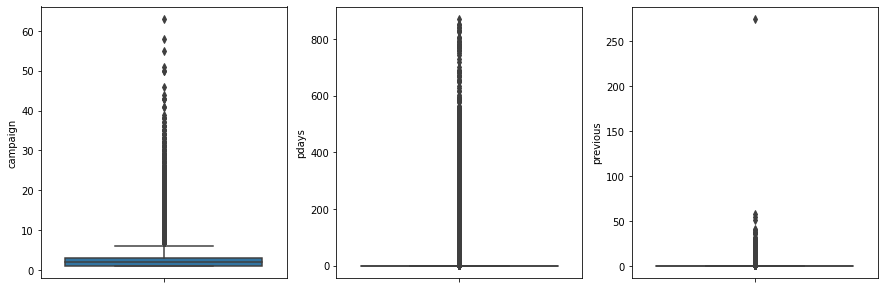

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="campaign", data=df)

plt.subplot(132)
sns.boxplot(y="pdays", data=df)

plt.subplot(133)
sns.boxplot(y="previous", data=df)

- > There are significant amount of outliers

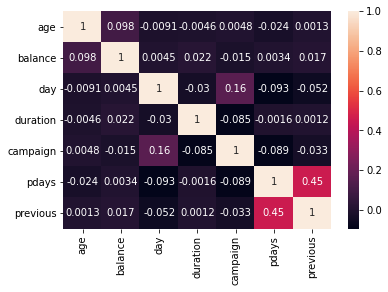

In [0]:
#Observing correlations
sns.heatmap(df.corr(),annot=True)

- > pdays, previous values are positively correlated

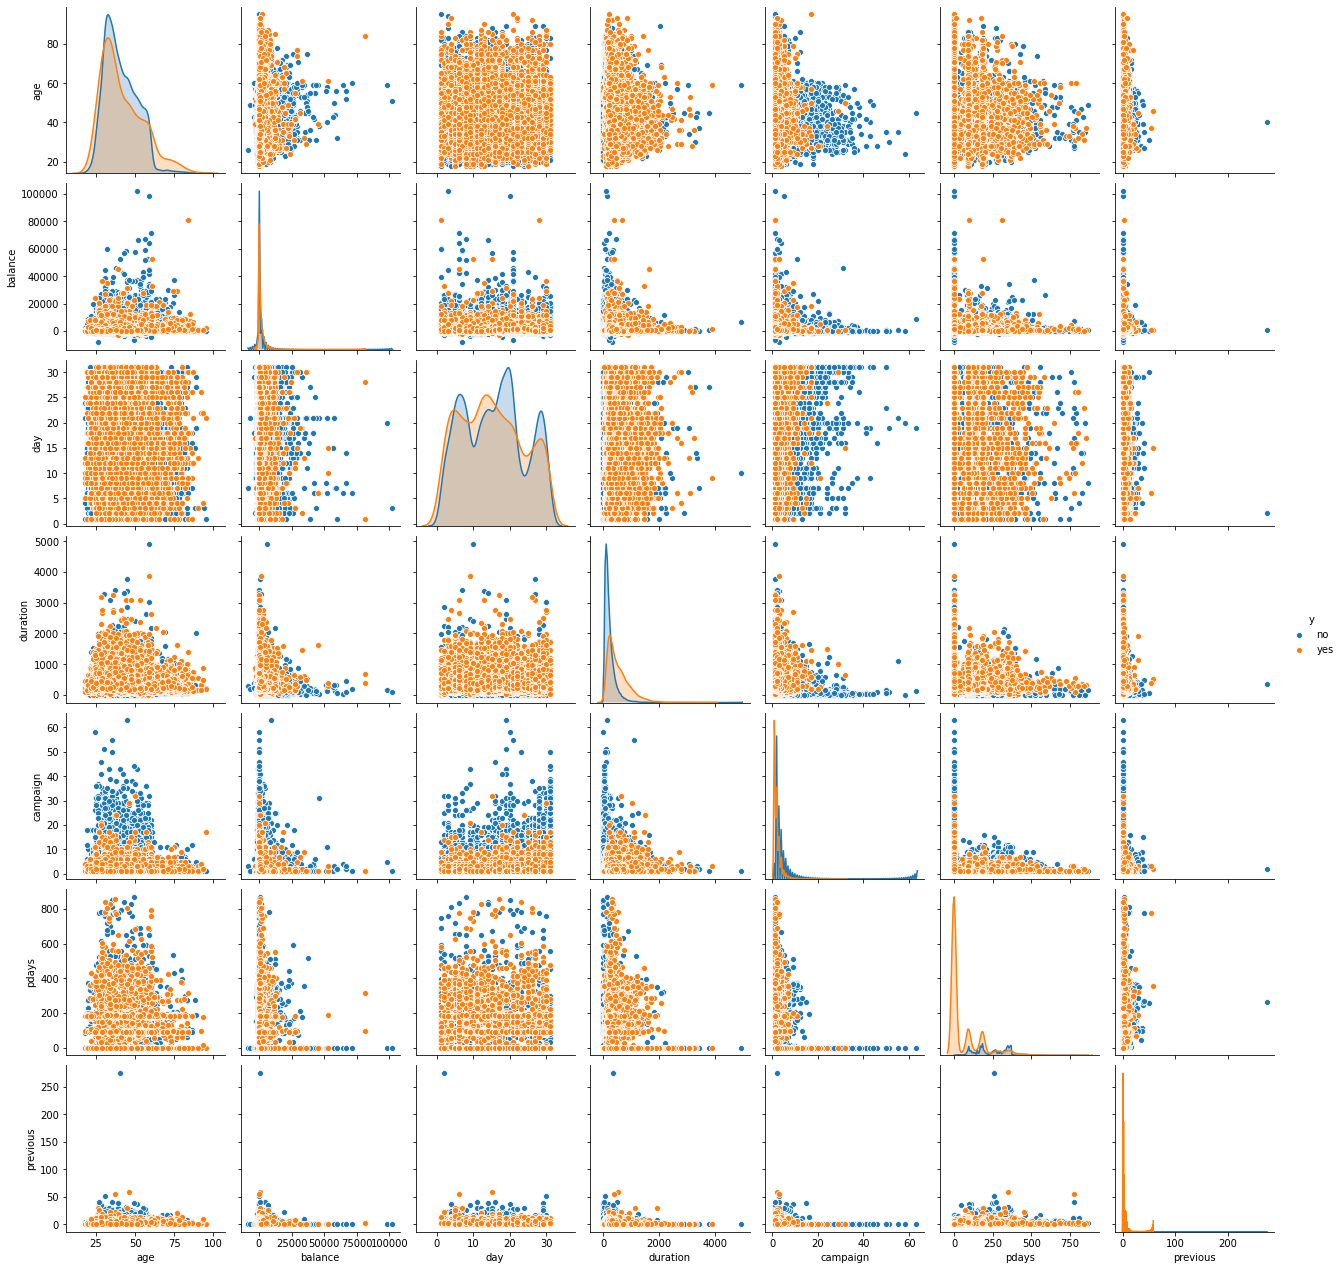

In [0]:
sns.pairplot(df,hue='y')

- > Most of the previous column values seems to take value 0

- > y is classified yes for almost all the previous values, itseems that y is not dependent much on previous column


In [0]:
df.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [0]:
(len(df.loc[df.previous!=0])) / (len(df.loc[df.previous == 0])) * 100

22.343995237322076

- >Nearly 80% of previous column takes value zero

- > **Since pdays and previous columns are correlated, we can drop previous column**

In [0]:
#Dropping previous column
df=df.drop(['previous'],axis=1)

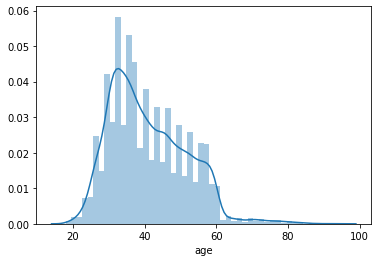

In [0]:
sns.distplot(df['age'])

- > Age is left skewed concentrated in range 20-60

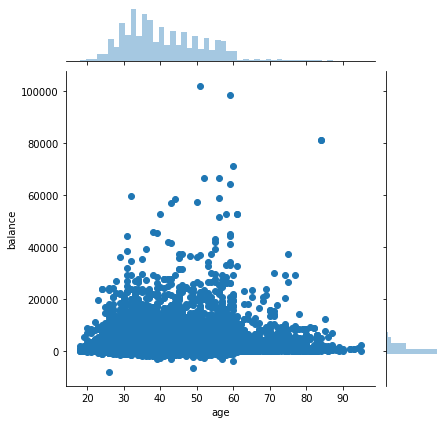

In [0]:
sns.jointplot(x="age", y="balance", data=df)

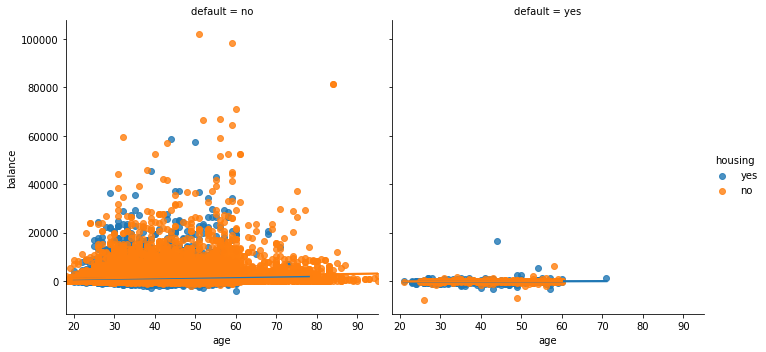

In [0]:
sns.lmplot('age', 'balance', data=df, hue='housing',col='default')

- > Large proportion of people of age group 20-60 have balance in the range 0-20000

- >Large proportion of people have no housing and no default

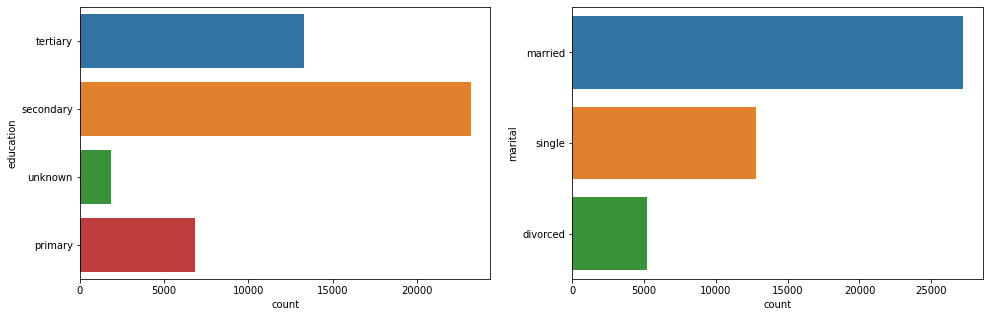

In [0]:
plt.figure(figsize=(25,5))

plt.subplot(131)
sns.countplot(y='education',data=df)

plt.subplot(132)
sns.countplot(y='marital',data=df)

- > Large proportion of people have secondary education

- > Majority of the people are married

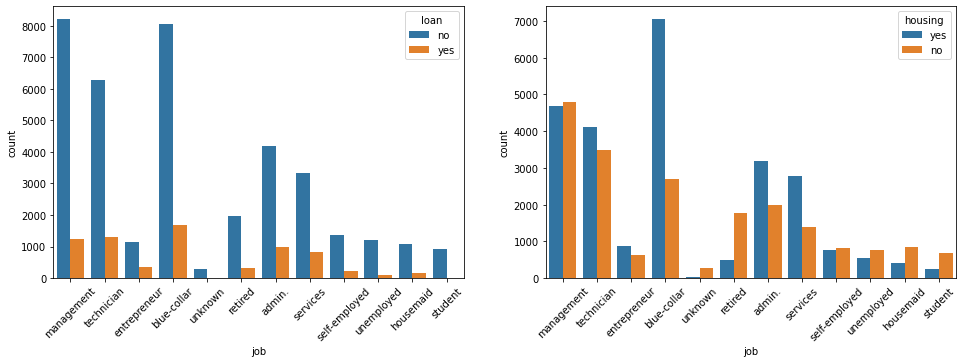

In [0]:
plt.figure(figsize=(25,5))
plt.subplot(131)
sns.countplot(x='job',hue='loan',data=df)
plt.xticks(rotation=45);
plt.subplot(132)
sns.countplot(x='job',hue='housing',data=df)
plt.xticks(rotation=45);

- > Majority of people work in blue-collar and management jobs

- > majority of people working in blue-collar,management jobs, technicians ,admins has housing loans or other loans


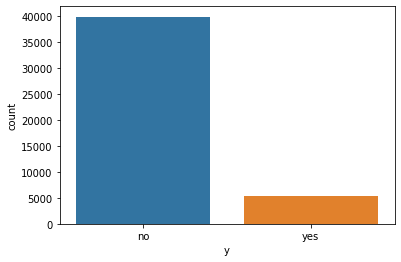

In [0]:
sns.countplot(x='y',data=df)

In [0]:
(len(df.loc[df.y=='yes'])) / (len(df.loc[df.y == 'no'])) * 100

13.248334251790991

- > This is **classification** problem 

- > We can see that only 13% is positive class i.e y labled as yes

- > This is an imbalanced data

- > **Accuracy is not a relaible metric to evaluate model performance for imbalanced datasets**

- > We need to focus on **F1-score** for model evaluation

## Data Preprocessing

In [0]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [0]:
#Encoding catogorical variables
#Label encoding
#Housing, Loan, Default, y columns takes only two values. Hence we can encode them to 0,1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])

In [0]:
#OneHotEncoding
#Other catogorical variables takes multiple values. OneHotEncoder is useful in this case
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,6,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [0]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,41:47] = sc.fit_transform(X_train[:,41:47])
X_test[:,41:47] = sc.transform(X_test[:,41:47])

## Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=105)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9707  271]
 [ 852  473]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.64      0.36      0.46      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



## K Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9687  291]
 [ 859  466]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9978
           1       0.62      0.35      0.45      1325

    accuracy                           0.90     11303
   macro avg       0.77      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303



## Support Vector Machine


In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9717  261]
 [ 836  489]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.65      0.37      0.47      1325

    accuracy                           0.90     11303
   macro avg       0.79      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[8995  983]
 [ 678  647]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      9978
           1       0.40      0.49      0.44      1325

    accuracy                           0.85     11303
   macro avg       0.66      0.69      0.68     11303
weighted avg       0.87      0.85      0.86     11303



## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9204  774]
 [ 707  618]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      9978
           1       0.44      0.47      0.45      1325

    accuracy                           0.87     11303
   macro avg       0.69      0.69      0.69     11303
weighted avg       0.87      0.87      0.87     11303



## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9670  308]
 [ 797  528]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.63      0.40      0.49      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303



## Artificial Neural Network

In [0]:
import tensorflow as tf
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

y_pred =ann.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2750 - accuracy: 0.8939
Epoch 2/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2220 - accuracy: 0.9035
Epoch 3/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2171 - accuracy: 0.9055
Epoch 4/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2141 - accuracy: 0.9069
Epoch 5/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2118 - accuracy: 0.9075
Epoch 6/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2102 - accuracy: 0.9080
Epoch 7/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2085 - accuracy: 0.9093
Epoch 8/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2076 - accuracy: 0.9085
Epoch 9/100
1060/1060 [==============================] - 2s 2ms/step - loss: 0.2067 - accuracy: 0.9086
Epoch 10/100
1060/1060 [==============================] - 2s 2ms/step - l

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
print()
print('Classification report:\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[9429  549]
 [ 550  775]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9978
           1       0.59      0.58      0.59      1325

    accuracy                           0.90     11303
   macro avg       0.77      0.76      0.77     11303
weighted avg       0.90      0.90      0.90     11303



## Model Selection

- > Since data is **imbalanced** we cannot rely on accuracy and hence we compare models using **F1-scores**

- > **Artificial neural network** outperforms other models with high F1-score for class 1

- >But Artificial neural networks **consume more time and space** and hence is not recommended if we have resource constraints

- > **Random Forest Classifier** will emerge as next best and optimal solution for this classification problem

**Note for PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_ = pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[1.34882718e-01 1.18182831e-01 1.09059714e-01 9.76569727e-02
 9.26009566e-02 8.30348954e-02 5.73033579e-02 4.21661362e-02
 3.37414816e-02 2.42541060e-02 2.35400982e-02 1.76450349e-02
 1.50378831e-02 1.34787960e-02 1.32314824e-02 1.23441247e-02
 1.11769270e-02 1.00890342e-02 9.42872744e-03 8.88080336e-03
 7.71459611e-03 6.87204581e-03 6.27686409e-03 5.50005538e-03
 5.03671309e-03 4.83908271e-03 4.53452347e-03 4.07613814e-03
 3.64519423e-03 3.35488375e-03 3.16858967e-03 2.94546620e-03
 2.76235584e-03 2.56803702e-03 1.89316145e-03 1.74027274e-03
 1.70172704e-03 1.30537967e-03 1.13912812e-03 6.29670976e-04
 5.59969863e-04 1.86399273e-14 8.70524898e-15 4.91597890e-15
 3.10005101e-15 9.51631881e-16 6.84144859e-16]


In [0]:
explained_variance[:34].sum()

0.9910307

- > We can choose 34 principle components so that 99% variance of data is retained 

- > This reduces column size from 46 to 34. But doing so decreases the performance of models. Hence avoided